## **Mô tả bài toán**
Một công ty bán hàng online tại UK cần đánh giá tính hình kinh doanh của họ, bộ dữ liệu được đưa cho người phân tích gồm các thông tin sau:

- InvoiceNo: Số hóa đơn
- StockCode: mã hàng
- Description: Mô tả hàng
- Quantity: Số lương
- InvoiceDate: Ngày bán
- UnitPrice: Đơn giá
- CustomerID: Mã khách
- Country: Nước sản xuất

Bạn hãy thực hiện các công việc sau:
1. Đọc dữ liệu từ file OnlineRetail.csv
2. Tìm hiểu cấu trúc bộ dữ liệu: Số lượng quan sát, số thuộc tính trong bộ dữ liệu, thang đo tương ứng của các thuộc tính
3. Hãy giải đáp các thắc mắc sau:Công ty bán hàng do bao nhiêu nước sản xuất
Tổng số lượng đơn hàng bán ra, tổng doanh thu
Top 10 mặt hàng có số lượng bán ra lớn nhất
Top 10 mặt hàng có doanh thu lớn nhất'''

In [ ]:
'''1. Đọc dữ liệu từ file OnlineRetail.csv'''
import pandas as pd
data=pd.read_csv('OnlineRetail.csv', encoding = "ISO-8859-1")

In [23]:
# hiển thị 5 dòng dữ liệu đầu tiên
data.head(5)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [21]:
'''2. Tìm hiểu cấu trúc bộ dữ liệu'''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


- Bộ dữ liệu chứa 541909 dòng dữ liệu và 8 cột, chỉ có cột CustomerID không có đầy đủ thông tin (406829 non-null <541909 )
- InvoiceNo, StockCode, Description, InvoiceDate, country: là thuộc tính định tính, có thang đo định danh
- CustomerID mặc dù có kiểu số (float64), nhưng các con số này chỉ có ý nghĩa phân biệt khác hàng này với khách hàng khác –> thuộc tính định danh
- Quantity, UnitPrice: thuộc tính định lượng, thang đo ratio

### **Công ty bán hàng do bao nhiêu nước sản xuất**

In [2]:
'''3. Giải đáp thắc mắc'''
# 3.1 Công ty bán hàng tại bao nhiêu quốc gia
# Lấy ra tên các quốc gia
country = data.Country.unique()
print ("số lượng các quốc gia: " + str(country.size))

số lượng các quốc gia: 38


### **Tổng số lượng đơn hàng bán ra, tổng doanh thu**

In [3]:
# 3.2 Số lượng đơn hàng bán ra và tổng doanh thu
# Tạo cột tính thành tiền của các mặt hàng
data['Total'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [4]:
data.InvoiceDate.value_counts()

10/31/2011 14:41    1114
12/8/2011 9:28       749
12/9/2011 10:03      731
12/5/2011 17:24      721
6/29/2011 15:58      705
                    ... 
9/28/2011 9:57         1
9/28/2011 9:45         1
3/16/2011 12:13        1
3/16/2011 12:22        1
3/16/2011 15:58        1
Name: InvoiceDate, Length: 23260, dtype: int64

In [5]:
# Giá trị đơn hàng của mỗi đơn hàng
total_invoices = data['Total'].sum()
print ("Số lượng hóa đơn bán ra: "+ str (total_invoices.size))
print ("Tổng doanh thu: " + str(total_invoices.sum()))

Số lượng hóa đơn bán ra: 1
Tổng doanh thu: 9747747.933999998


### **Top 10 mặt hàng có số lượng hóa đơn bán ra nhiều nhất**

In [6]:
# 3.3 Method 1: Top 10 mặt hàng có số lượng bán ra lớn nhất
quantity_product = data.sort_values('Quantity',ascending= False)
quantity_product[['StockCode', 'Description', 'Quantity']].head(10)

,StockCode,Description,Quantity
540421,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
61619,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215
502122,84826,ASSTD DESIGN 3D PAPER STICKERS,12540
74614,37413,NaN,5568
421632,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800
206121,22197,SMALL POPCORN HOLDER,4300
220843,85123A,?,4000
97432,22053,EMPIRE DESIGN ROSETTE,3906
270885,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186
160546,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114


In [7]:
# Nếu groupby 'StockCode' và 'Description' 
# thì kết quả trả về sẽ tự loại bỏ kết quả Description có chứa 'NaN' ? không đúng lắm
quantity_product2 = data.groupby(['StockCode', 'Description'])['Quantity'].max().sort_values(ascending= False)
quantity_product2.head(10)

StockCode  Description                        
23843      PAPER CRAFT , LITTLE BIRDIE            80995
23166      MEDIUM CERAMIC TOP STORAGE JAR         74215
84826      ASSTD DESIGN 3D PAPER STICKERS         12540
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS       4800
22197      SMALL POPCORN HOLDER                    4300
85123A     ?                                       4000
22053      EMPIRE DESIGN ROSETTE                   3906
18007      ESSENTIAL BALM 3.5g TIN IN ENVELOPE     3186
21108      FAIRY CAKE FLANNEL ASSORTED COLOUR      3114
23343      came coded as 20713                     3100
Name: Quantity, dtype: int64

### **Top 10 mặt hàng có tổng số lượng hóa đơn bán ra lớn nhất**

In [8]:
# 3.3 Method 2: Top 10 mặt hàng có tổng số lượng bán ra lớn nhất
quantity_product2 = data.groupby('StockCode')['Quantity'].sum().sort_values(ascending= False)
quantity_product2.head(10)

StockCode
22197     56450
84077     53847
85099B    47363
85123A    38830
84879     36221
21212     36039
23084     30646
22492     26437
22616     26315
21977     24753
Name: Quantity, dtype: int64

In [9]:
# 3.3 Method 2: Top 10 mặt hàng có tổng số lượng bán ra lớn nhất
quantity_product2 = data.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending= False)
quantity_product2.head(10)

StockCode  Description                       
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
85099B     JUMBO BAG RED RETROSPOT               47363
84879      ASSORTED COLOUR BIRD ORNAMENT         36381
22197      POPCORN HOLDER                        36334
21212      PACK OF 72 RETROSPOT CAKE CASES       36039
85123A     WHITE HANGING HEART T-LIGHT HOLDER    35025
23084      RABBIT NIGHT LIGHT                    30680
22492      MINI PAINT SET VINTAGE                26437
22616      PACK OF 12 LONDON TISSUES             26315
21977      PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64

### **Top 10 mặt hàng có doanh thu lớn nhất**

In [10]:
# 3.3 Top 10 mặt hàng có doanh thu lớn nhất
# sử dụng groupby để tiến hành tính tổng (sum) theo nhóm.
#Vì mỗi mã hàng sẽ có một mô tả tương ứng, để rõ ràng, tiến hành gom nhóm theo 2 thuộc tính: StockCode, Description
total_quantity_product = data.groupby(['StockCode', 'Description'])['Total'].sum().sort_values(ascending= False)
total_quantity_product.head(10)

StockCode  Description                       
DOT        DOTCOM POSTAGE                        206245.48
22423      REGENCY CAKESTAND 3 TIER              164762.19
47566      PARTY BUNTING                          98302.98
85123A     WHITE HANGING HEART T-LIGHT HOLDER     97715.99
85099B     JUMBO BAG RED RETROSPOT                92356.03
23084      RABBIT NIGHT LIGHT                     66756.59
POST       POSTAGE                                66230.64
22086      PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
84879      ASSORTED COLOUR BIRD ORNAMENT          58959.73
79321      CHILLI LIGHTS                          53768.06
Name: Total, dtype: float64

**Kết luận:**
- Chúng ta nhìn thấy rằng, mặt hàng bán ra với số lượng nhiều nhất, không phải mặt hàng mang lại doanh thu lớn nhất
- Có một số mặt hàng như 85099B – JUMBO BAG RED RETROSPOT và 23084 RABBIT NIGHT LIGHT nằm trong top 10 cả về số lượng lẫn doanh thu

### **Trích xuất dữ liệu các cột Description và Quantity lưu vào file OnlineRetail.csv**

In [11]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [14]:
info_desc_qunt = data.loc[:, ['Description','Quantity']]
info_desc_qunt

,Description,Quantity
0,WHITE HANGING HEART T-LIGHT HOLDER,6
1,WHITE METAL LANTERN,6
2,CREAM CUPID HEARTS COAT HANGER,8
3,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12
541905,CHILDREN'S APRON DOLLY GIRL,6
541906,CHILDRENS CUTLERY DOLLY GIRL,4
541907,CHILDRENS CUTLERY CIRCUS PARADE,4


In [15]:
info_desc_qunt.to_csv('OnlineRetail.csv')

### **Trích xuất 1000 dòng đầu tiên lưu vào file OnlineRetail.xlsx**

In [19]:
info_1000_rows = data.iloc[:1000]
info_1000_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
995,536520,22469,HEART OF WICKER SMALL,1,12/1/2010 12:43,1.65,14729.0,United Kingdom,1.65
996,536520,22100,SKULLS SQUARE TISSUE BOX,1,12/1/2010 12:43,1.25,14729.0,United Kingdom,1.25
997,536520,22096,PINK PAISLEY SQUARE TISSUE BOX,1,12/1/2010 12:43,1.25,14729.0,United Kingdom,1.25
998,536520,22583,PACK OF 6 HANDBAG GIFT BOXES,1,12/1/2010 12:43,2.55,14729.0,United Kingdom,2.55


In [34]:
info_1000_rows.to_excel('OnlineRetail.xlsx')

### **Trích xuất các bản ghi có số lượng từ 10 trở lên lưu vào file Online.Retail.h5**

In [33]:
data.Quantity.value_counts().head(10)

1     232
2     132
6     122
12    116
3      95
4      52
24     51
8      40
10     26
5      22
Name: Quantity, dtype: int64

In [32]:
qunt_bigger_10 = data[data.Quantity > 10]
qunt_bigger_10

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,54.08
26,26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France,90.00
27,27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France,90.00
28,28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France,45.00
29,29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France,10.20
...,...,...,...,...,...,...,...,...,...,...
944,944,536514,22866,HAND WARMER SCOTTY DOG DESIGN,36,12/1/2010 12:40,2.10,17951.0,United Kingdom,75.60
950,950,536520,21292,SMALL STRIPES CHOCOLATE GIFT BAG,16,12/1/2010 12:43,0.85,14729.0,United Kingdom,13.60
960,960,536520,22151,PLACE SETTING WHITE HEART,14,12/1/2010 12:43,0.42,14729.0,United Kingdom,5.88
982,982,536520,21584,RETROSPOT SMALL TUBE MATCHES,12,12/1/2010 12:43,1.65,14729.0,United Kingdom,19.80


In [38]:
qunt_bigger_10.to_html('OnlineRetail.html')

### **Trích xuất dữ liệu các phần tử từ dòng 1000 đến dòng 2000, các cột Quantity, InvoiceDate lưu vào file OnlineRetail.json**

In [58]:
data.loc[900:2000,['Quantity', 'InvoiceDate', 'UnitPrice']]

,Quantity,InvoiceDate,UnitPrice
900,1,12/1/2010 12:31,4.25
901,1,12/1/2010 12:31,1.45
902,1,12/1/2010 12:31,4.25
903,1,12/1/2010 12:31,6.75
904,1,12/1/2010 12:31,0.95
...,...,...,...
995,1,12/1/2010 12:43,1.65
996,1,12/1/2010 12:43,1.25
997,1,12/1/2010 12:43,1.25
998,1,12/1/2010 12:43,2.55


### **Trích xuất các bản ghi có số hoá đơn '536365'**

In [61]:
data.loc[data.InvoiceNo == '536365']

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,15.30
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,25.50


## **Sử dụng thư viện Seaborn để vẽ và tinh chỉnh được một số biểu đồ**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
# Loại bỏ dữ liệu khuyết
data.dropna()
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
data.shape

(541909, 8)

In [11]:
# Tính giá của mỗi mã sản phẩm ở các đơn hàng
data["Price"] = data["Quantity"] * data["UnitPrice"]

In [12]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


### **Vẽ biểu đồ phân bố**

In [13]:
# Vẽ biểu đồ phân bố cho đơn giá sản phẩm

<AxesSubplot:ylabel='UnitPrice'>

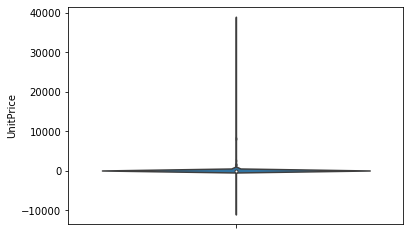

In [16]:
sns.violinplot(y='UnitPrice', data=data)

**Nhận xét:**
+ Có thể nhận thấy dữ liệu phân bố không được đều, nhiều sản phẩm giá thấp và ít sản phẩm giá cao.

In [ ]:
# Vẽ biểu đồ phân bố cho tổng giá mỗi sản phẩm ở các đơn

<AxesSubplot:ylabel='Price'>

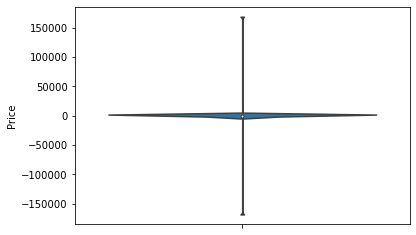

In [17]:
sns.violinplot(y='Price',data=data)

In [18]:
# Tính số lượng sản phẩm của mỗi đơn hàng

In [46]:
# reset_index() được sử dụng để đặt lại chỉ mục trên DataFrame
invoiceno_quantity = data.groupby('InvoiceNo')['Quantity'].sum().reset_index()

In [47]:
invoiceno_quantity.sort_values('Quantity',ascending=False)

,InvoiceNo,Quantity
22025,581483,80995
2303,541431,74215
9951,556917,15049
12983,563076,14730
18776,574941,14149
...,...,...
22076,C536757,-9360
9854,556691,-9600
9853,556690,-9600
22510,C541433,-74215


In [43]:
invoiceno_quantity.head()

,InvoiceNo,Quantity
0,536365,40
1,536366,12
2,536367,83
3,536368,15
4,536369,3


In [44]:
invoiceno_quantity.max()

InvoiceNo    C581569
Quantity       80995
dtype: object

<AxesSubplot:ylabel='Quantity'>

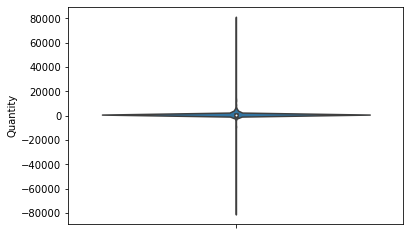

In [45]:
sns.violinplot(y='Quantity', data=invoiceno_quantity)

### **Vẽ biểu đồ tần số**

In [ ]:
# Loại bỏ dữ liệu trùng lặp

In [3]:
data2 = data.drop_duplicates(subset='InvoiceNo')

In [4]:
data2.shape

(25900, 8)

In [ ]:
# Vẽ biểu đồ tần số cho số hóa đơn theo quốc gia

In [ ]:
sns.countplot(x='Country, data=data2)
plt.xticks(rotation = 90,ha = 'right')
plt.show()

**Nhận xét:**
+ Có thể nhận thấy rằng số sản phẩm và số hóa đơn được mua rất nhiều ở Anh, áp đảo so với phần còn lại

### **Vẽ biểu đồ boxplot**

In [ ]:
# Vẽ biểu đồ box plot cho thuộc tính giá sản phẩm

In [ ]:
sns.box